Importing relevant libraries for data wrangling

In [1]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Reading the strats CSV file for PPS for k=6 into a DF

In [30]:
df_k6 = pd.DataFrame()
cols_list_k6 = [1]
for i in range(8, (60*7 + 2), 7):  # Strategy is in every 7th column starting at the 6th column for 60 traders
    cols_list_k6.append(i)

df_k6_row_times = []
for i in range(0, 2592000, 3600):
    df_k6_row_times.append(i)

df_k6_col_names = ["time"]
for i in range(30):
    if i < 10:
        df_k6_col_names.append("B0" + str(i))
    else:
        df_k6_col_names.append("B" + str(i))

for i in range(30):
    if i < 10:
        df_k6_col_names.append("S0" + str(i))
    else:
        df_k6_col_names.append("S" + str(i))


for i in range(10):
    #df_k6_i = pd.DataFrame()
    df_k6_i_list = []
    df_k6_i_list.append(pd.read_csv("PRDE_Baseline_k=6_" + str(i) + "_strats.csv", header=None, usecols=cols_list_k6))
    df_k6_i = pd.concat(df_k6_i_list)

    df_k6_i.columns = df_k6_col_names
    df_k6_i.set_index("time", inplace=True)
    df_k6[f"Total PPS {i}"] = df_k6_i.sum(axis=1)

df_k6["Mean PPS"] = df_k6.sum(axis=1) / 10
df_k6

,Total PPS 0,Total PPS 1,Total PPS 2,Total PPS 3,Total PPS 4,Total PPS 5,Total PPS 6,Total PPS 7,Total PPS 8,Total PPS 9,Mean PPS
time,,,,,,,,,,,
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
3600,54.750280,50.693334,50.875321,53.377005,45.727776,48.493890,42.324999,54.073054,44.342296,50.866114,49.552407
7200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10800,48.259831,53.333333,48.996944,48.595275,54.681669,41.478703,48.304167,52.483610,50.730280,52.016110,49.887992
14400,0.000000,52.985139,48.979448,48.417362,54.761109,41.485832,48.606389,52.232358,50.564026,51.776671,44.980833
...,...,...,...,...,...,...,...,...,...,...,...
2574000,62.438037,64.379179,62.926116,62.171553,65.257869,65.099172,62.988433,60.657074,61.773107,62.573931,63.026447
2577600,62.383263,64.088574,62.841991,61.948573,65.306209,64.981841,63.062079,60.449549,61.773787,62.758561,62.959443
2581200,64.571806,61.196555,61.943977,61.404278,63.600031,64.602836,64.265114,62.626383,56.988796,64.652987,62.585276


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

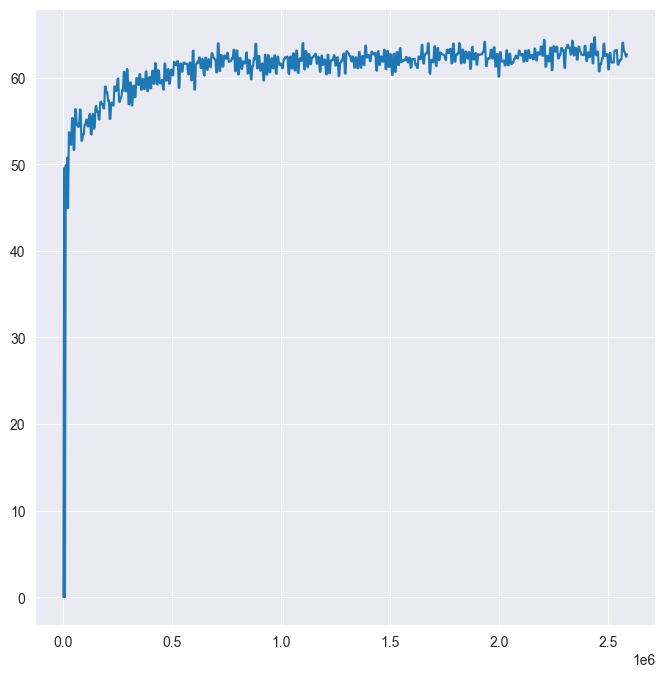

In [46]:
fig = plt.figure(figsize=(8,8))
k6_SP = sns.lineplot(data=df_k6, x="time", y="Mean PPS", legend=True)
k6_SP.set_ylabel("Average Profit Per Second / £")
plt.show()